In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/defect_detection/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/defect_detection/'
/content/drive/MyDrive/defect_detection


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'dataset/train/',  # This is the source directory for training images
        classes = ['defected', 'defectless'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=25,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'dataset/validation/',  # This is the source directory for training images
        classes = ['defected', 'defectless'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=5,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 199 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(200, 200, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(1, activation = 'sigmoid'))
model.layers[0].trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.optimizers import RMSprop

# model.compile(loss='binary_crossentropy',
#               optimizer=RMSprop(lr=0.001),
#               metrics=['accuracy', tf.keras.metrics.AUC()])

from tensorflow.keras import optimizers


model.compile(optimizer=RMSprop(lr=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 111s 10s/step - loss: 1.4651 - accuracy: 0.5302 - val_loss: 0.7039 - val_accuracy: 0.6000
Epoch 2/15
8/8 [==============================] - 3s 407ms/step - loss: 0.7510 - accuracy: 0.6306 - val_loss: 1.1191 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 3s 399ms/step - loss: 0.4829 - accuracy: 0.7900 - val_loss: 0.5099 - val_accuracy: 0.7250
Epoch 4/15
8/8 [==============================] - 3s 416ms/step - loss: 0.5044 - accuracy: 0.7807 - val_loss: 1.1589 - val_accuracy: 0.5000
Epoch 5/15
8/8 [==============================] - 3s 404ms/step - loss: 0.6591 - accuracy: 0.6771 - val_loss: 0.4656 - val_accuracy: 0.7500
Epoch 6/15
8/8 [==============================] - 3s 404ms/step - loss: 0.5478 - accuracy: 0.6870 - val_loss: 0.4048 - val_accuracy: 0.8000
Epoch 7/15
8/8 [==============================] - 3s 399ms/step - loss: 0.5370 - accuracy: 0.7375 - val_loss: 0.4231 - val_accuracy: 0.8250
Epoch 8/15
8/8 [====

In [ ]:
model.evaluate(validation_generator)

10/10 [==============================] - 2s 236ms/step - loss: 0.4815 - accuracy: 0.7500


[0.4815189838409424, 0.75]

Saving 0002_000_01.png to 0002_000_01.png


NameError: ignored

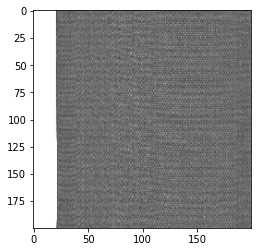

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is defected")
  else:
    print(fn + " is defectless")
 